## Importing Libraries

In [1]:
import numpy as np

import pandas as pd
#pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)

import json #library to handle json files

#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim

import requests #library to handle requests
from pandas.io.json import json_normalize #transform JSON file into pandas dataframe

#Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes
import folium

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print('Libraries imported..')

Libraries imported..



-----
-----

## Part 1

#### Extracting the table from wikipedia
`https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M`

In [2]:
#import beautiful souplibrary

from bs4 import BeautifulSoup as bs
print('BeautifulSoup library imported..')

BeautifulSoup library imported..


In [3]:
#sending a get request to the url
url = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
soup = bs(url,'lxml')

#extracting only the table
data_table = soup.find('table',{'class':'wikitable sortable'})

#converting the wikipedia data table to python dataframe
df = pd.DataFrame(pd.read_html(str(data_table))[0])

#removing spaces in the column names of the dataframe
df.columns =  df.columns.str.replace(' ','')

print("The dataframe has {} columns and {} rows".format(df.shape[1],df.shape[0]))
df.head()  

The dataframe has 3 columns and 180 rows


,PostalCode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [4]:
#Removing rows where Boroughs are Not Assigned
df = df[df['Borough'] != 'Not assigned'].reset_index(drop = True)
print("The dataframe has {} columns and {} rows".format(df.shape[1],df.shape[0]))
df.head()

The dataframe has 3 columns and 103 rows


,PostalCode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [5]:
#checking if there are any Neighborhood that are Not Assigned
number_of_non_assigned_nbhds = list(df['Neighbourhood'] == 'Not Assigned').count(True)
print("The total number of Neighborhoods that are `Not Assigned` are {}".format(number_of_non_assigned_nbhds))

The total number of Neighborhoods that are `Not Assigned` are 0


In [6]:
#checking if more than one Neighborhood is listed twice. If it is listed twice, separate the neighborhood by columns
print("There are {} rows in the dataframe".format(df.shape[0]))
print("There are {} unique postal codes".format(len(df['PostalCode'].unique())))
print("Since the number of rows = number of unique postal codes, we can conclude no postal codes are listed twice")

There are 103 rows in the dataframe
There are 103 unique postal codes
Since the number of rows = number of unique postal codes, we can conclude no postal codes are listed twice


#### Final DataFrame

In [7]:
print("The final dataframe for Part 1 of the Excercise")
print("The data frame has {} rows and {} columns".format(df.shape[0],df.shape[1]))
df

The final dataframe for Part 1 of the Excercise
The data frame has 103 rows and 3 columns


,PostalCode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"



-----
-----

## Part 2

#### Read the csv file to obtain the latitude and longitude information for the dataframe

In [8]:
cord_df = pd.read_csv('Geospatial_Coordinates.csv')
cord_df.columns = cord_df.columns.str.replace(' ','')
cord_df

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


#### Merging the coordinates information and our dataframe containing neighborhoods

In [9]:
toronto_data = pd.merge(df,cord_df,on='PostalCode')
toronto_data.head()

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


-----
-----

## Part 3

#### Exploration and Clustering

In [10]:
#Visualization to see then number of Neighborhoods per Borough

#importing the required libraries
import matplotlib.pyplot as plt
import seaborn as sns

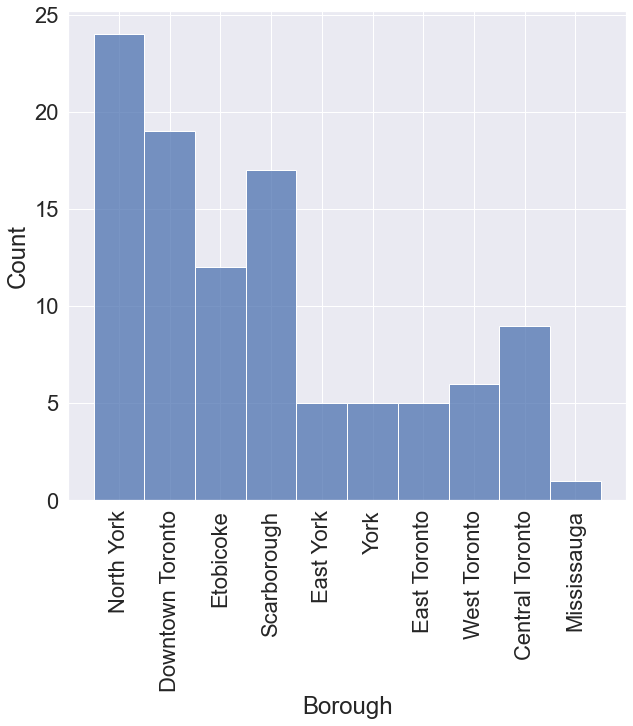

In [11]:
plt.figure(figsize = (10,9))

sns.set(font_scale = 2)

sns.histplot(toronto_data['Borough'])

plt.xticks(rotation = 90)

plt.show()

**North York** has the most number of Neighborhoods.

Since **Toronto** is a major city, start by exploring the venues around Toronto.

##### Lets create a dataframe that contains only the following - 
1. East Toronto
2. West Toronto
3. Downtown Toronto
4. Central Toronto

In [12]:
#create an emptry dataframe
toronto = pd.DataFrame()

#add Boroughs
toronto = toronto_data[toronto_data['Borough'].str.contains('Toronto')].copy().reset_index(drop = True)

print("The dataframe has {} rows".format(toronto.shape[0]))
toronto

The dataframe has 39 rows


,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M4E,East Toronto,The Beaches,43.676357,-79.293031
5,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
6,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
7,M6G,Downtown Toronto,Christie,43.669542,-79.422564
8,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568
9,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259


In [13]:
address = 'Toronto, Ontario'

geolocator = Nominatim(user_agent='explorer')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print("The coordinates for Toronto, Ontario are {} {}".format(latitude,longitude))

The coordinates for Toronto, Ontario are 43.6534817 -79.3839347


In [14]:
#Map of Toronto Ontario

map_toronto = folium.Map(location = [latitude,longitude],zoom_start = 10)

for lat, lng, bgh, nbhd in zip(toronto_data['Latitude'],
                               toronto_data['Longitude'],
                               toronto_data['Borough'],
                               toronto_data['Neighbourhood']):
    label = '{}, {}'.format(nbhd, bgh)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
    [lat,lng],
    popup = label,
    fill = True,
    fill_color = '317y6cc',
    parse_html = True).add_to(map_toronto)
    


map_toronto

#### Lets dig deeper and explore **Downtown Toronto**. This place is expected to have a lot of venues since it is the buzzing area.

In [16]:
address = 'Downtown, Toronto'

geolocator = Nominatim(user_agent = 'explorer')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinate of Downtown Toronto are {} {}'.format(latitude, longitude))

The geographical coordinate of Downtown Toronto are 43.6541737 -79.38081164513409


In [17]:
LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '6017f5bdc43125231111a9c8'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Bay Street Corridor',
  'headerFullLocation': 'Bay Street Corridor, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 90,
  'suggestedBounds': {'ne': {'lat': 43.6586737045, 'lng': -79.37460365419369},
   'sw': {'lat': 43.6496736955, 'lng': -79.38701963607448}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4ad4c062f964a520b5f720e3',
       'name': 'Elgin And Winter Garden Theatres',
       'location': {'address': '189 Yonge St',
        'crossStreet': 'btwn Queen St E & Shuter St',
        'lat': 43.653393796019586,
        'lng': -79.378507396

In [18]:
venues_DT = results['response']['groups'][0]['items']

#creating the dataframe
venues_df_DT = json_normalize(venues_DT)

columns = ['venue.name','venue.categories','venue.location.lat','venue.location.lng']
venues_df_DT = venues_df_DT[columns]

venues_df_DT

<ipython-input-18-1810fdaeaad6>:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  venues_df_DT = json_normalize(venues_DT)


,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,Elgin And Winter Garden Theatres,"[{'id': '4bf58dd8d48988d137941735', 'name': 'T...",43.653394,-79.378507
1,UNIQLO ユニクロ,"[{'id': '4bf58dd8d48988d103951735', 'name': 'C...",43.655910,-79.380641
2,LUSH,"[{'id': '4bf58dd8d48988d10c951735', 'name': 'C...",43.653557,-79.380400
3,Yonge-Dundas Square,"[{'id': '4bf58dd8d48988d164941735', 'name': 'P...",43.656054,-79.380495
4,Ed Mirvish Theatre,"[{'id': '4bf58dd8d48988d137941735', 'name': 'T...",43.655102,-79.379768
5,CF Toronto Eaton Centre,"[{'id': '4bf58dd8d48988d1fd941735', 'name': 'S...",43.654447,-79.380952
6,Crepe Delicious,"[{'id': '4bf58dd8d48988d16e941735', 'name': 'F...",43.654536,-79.380889
7,Indigo,"[{'id': '4bf58dd8d48988d114951735', 'name': 'B...",43.653515,-79.380696
8,Blaze Pizza,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",43.656518,-79.380015
9,Jazz Bistro,"[{'id': '4bf58dd8d48988d1e5931735', 'name': 'M...",43.655678,-79.379276


In [19]:
#extracting the venue category
venues_df_DT['venue.categories'] = venues_df_DT['venue.categories'].str[0].str['name']
venues_df_DT

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,Elgin And Winter Garden Theatres,Theater,43.653394,-79.378507
1,UNIQLO ユニクロ,Clothing Store,43.655910,-79.380641
2,LUSH,Cosmetics Shop,43.653557,-79.380400
3,Yonge-Dundas Square,Plaza,43.656054,-79.380495
4,Ed Mirvish Theatre,Theater,43.655102,-79.379768
5,CF Toronto Eaton Centre,Shopping Mall,43.654447,-79.380952
6,Crepe Delicious,Fast Food Restaurant,43.654536,-79.380889
7,Indigo,Bookstore,43.653515,-79.380696
8,Blaze Pizza,Pizza Place,43.656518,-79.380015
9,Jazz Bistro,Music Venue,43.655678,-79.379276


In [20]:
venues_df_DT.columns = venues_df_DT.columns.str.split('.').str[1]
venues_df_DT

,name,categories,location,location
0,Elgin And Winter Garden Theatres,Theater,43.653394,-79.378507
1,UNIQLO ユニクロ,Clothing Store,43.655910,-79.380641
2,LUSH,Cosmetics Shop,43.653557,-79.380400
3,Yonge-Dundas Square,Plaza,43.656054,-79.380495
4,Ed Mirvish Theatre,Theater,43.655102,-79.379768
5,CF Toronto Eaton Centre,Shopping Mall,43.654447,-79.380952
6,Crepe Delicious,Fast Food Restaurant,43.654536,-79.380889
7,Indigo,Bookstore,43.653515,-79.380696
8,Blaze Pizza,Pizza Place,43.656518,-79.380015
9,Jazz Bistro,Music Venue,43.655678,-79.379276


In [21]:
unique_categories = len(venues_df_DT['categories'].unique())
print("There are {} unique venue categories".format(unique_categories))

There are 58 unique venue categories


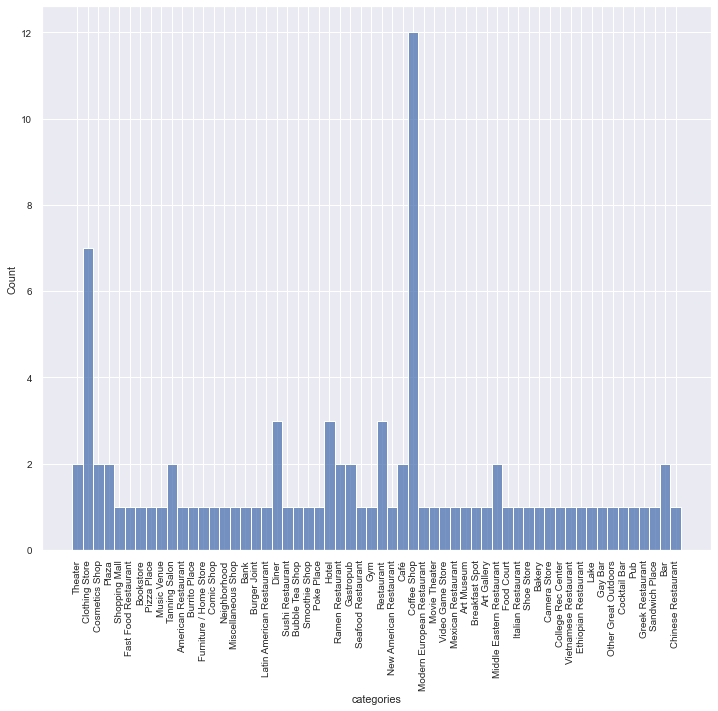

In [22]:
#Visualizing the venue categories

plt.figure(figsize = (12,10))

sns.set(font_scale = 0.9)
sns.histplot(venues_df_DT['categories'])
plt.xticks(rotation = 90)

plt.show()

In [23]:
venues_df_DT['name'].value_counts()

Tim Hortons                                  4
Starbucks                                    2
Magic Tailor                                 1
Leña                                         1
Blaze Pizza                                  1
Pantages Hotel & Spa                         1
Mast Coffee                                  1
Richmond Station                             1
Tokyo Smoke                                  1
Elgin And Winter Garden Theatres             1
GoodLife Fitness Toronto 137 Yonge Street    1
Booster Juice                                1
Cambridge Suites Toronto                     1
The Elm Tree Restaurant                      1
Jack Astor's Bar & Grill                     1
EB Games                                     1
Sol'exotica Tanning Spa                      1
Chatime 日出茶太                                 1
Dineen Coffee                                1
Goodhandy's                                  1
Lake Devo                                    1
Hokkaido Rame

### Function to explore all neighborhoods

In [24]:
#(taken from week 3 lab)
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Explore only the Boroughs that contain Toronto in it (Downtown Toronto, West Toronto, East Toronto and Central Toronto)

In [25]:
toronto_venues_all = getNearbyVenues(names=toronto['Neighbourhood'],
                                   latitudes=toronto['Latitude'],
                                   longitudes=toronto['Longitude']
                                  )

Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
The Danforth West, Riverdale
Toronto Dominion Centre, Design Exchange
Brockton, Parkdale Village, Exhibition Place
India Bazaar, The Beaches West
Commerce Court, Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West, Forest Hill Road Park
High Park, The Junction South
North Toronto West, Lawrence Park
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
University of Toronto, Harbord
Runnymede, Swansea
Moore Park, Summerhill East
Kensington Market, Chinatown, Grange Park
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
R

In [26]:
toronto_venues_all

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park, Harbourfront",43.654260,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
1,"Regent Park, Harbourfront",43.654260,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
2,"Regent Park, Harbourfront",43.654260,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,"Regent Park, Harbourfront",43.654260,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa
4,"Regent Park, Harbourfront",43.654260,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant
5,"Regent Park, Harbourfront",43.654260,-79.360636,Dominion Pub and Kitchen,43.656919,-79.358967,Pub
6,"Regent Park, Harbourfront",43.654260,-79.360636,Morning Glory Cafe,43.653947,-79.361149,Breakfast Spot
7,"Regent Park, Harbourfront",43.654260,-79.360636,Corktown Common,43.655618,-79.356211,Park
8,"Regent Park, Harbourfront",43.654260,-79.360636,The Extension Room,43.653313,-79.359725,Gym / Fitness Center
9,"Regent Park, Harbourfront",43.654260,-79.360636,The Distillery Historic District,43.650244,-79.359323,Historic Site


In [27]:
#Check how many venues were returned for each neighborhood

toronto_venues_all.groupby(toronto_venues_all['Neighborhood']).count()['Venue'].sort_values()

Neighborhood
Roselawn                                                                                                        3
Forest Hill North & West, Forest Hill Road Park                                                                 4
Rosedale                                                                                                        4
Lawrence Park                                                                                                   4
The Beaches                                                                                                     5
Davisville North                                                                                                8
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park                                              14
Parkdale, Roncesvalles                                                                                         14
Christie                                                                   

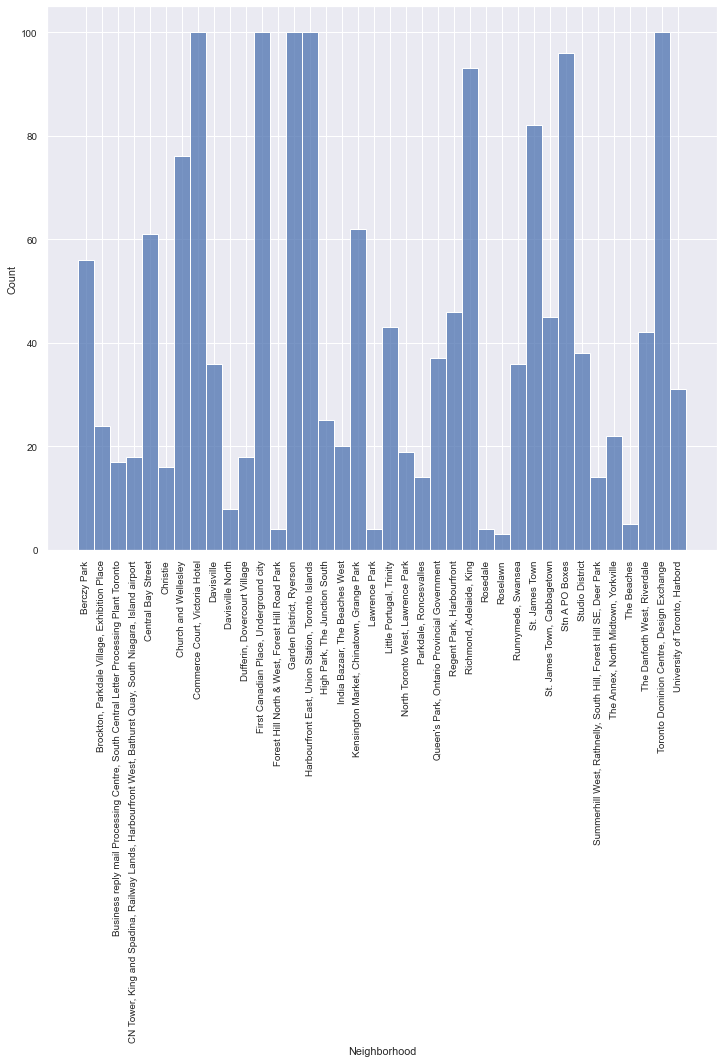

In [28]:
#lets visualize this

plt.figure(figsize = (12,10))

sns.set(font_scale = 0.9)
sns.histplot(toronto_venues_all['Neighborhood'].sort_values())
plt.xticks(rotation = 90)

plt.show()

In [29]:
#Analyze each neighborhood

toronto_venues_all_onehot = pd.get_dummies(toronto_venues_all[['Venue Category']], prefix="", prefix_sep="")
len(toronto_venues_all_onehot.columns.to_list())
toronto_venues_all_onehot.head()

,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Rental / Bike Share,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,South American Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [30]:
toronto_venues_all_onehot.columns = toronto_venues_all_onehot.columns.str.replace(' ','_')
toronto_venues_all_onehot.columns = toronto_venues_all_onehot.columns.str.replace('/','')
len(toronto_venues_all_onehot.columns.to_list())
toronto_venues_all_onehot.head()

,Airport,Airport_Food_Court,Airport_Gate,Airport_Lounge,Airport_Service,Airport_Terminal,American_Restaurant,Antique_Shop,Aquarium,Art_Gallery,Art_Museum,Arts_&_Crafts_Store,Asian_Restaurant,Athletics_&_Sports,Auto_Workshop,BBQ_Joint,Baby_Store,Bagel_Shop,Bakery,Bank,Bar,Baseball_Stadium,Basketball_Stadium,Beach,Bed_&_Breakfast,Beer_Bar,Beer_Store,Belgian_Restaurant,Bike_Rental__Bike_Share,Bistro,Boat_or_Ferry,Bookstore,Boutique,Brazilian_Restaurant,Breakfast_Spot,Brewery,Bubble_Tea_Shop,Building,Burger_Joint,Burrito_Place,Bus_Line,Business_Service,Butcher,Café,Cajun__Creole_Restaurant,Candy_Store,Caribbean_Restaurant,Cheese_Shop,Chinese_Restaurant,Chocolate_Shop,Church,Climbing_Gym,Clothing_Store,Cocktail_Bar,Coffee_Shop,College_Arts_Building,College_Auditorium,College_Cafeteria,College_Gym,College_Rec_Center,Colombian_Restaurant,Comfort_Food_Restaurant,Comic_Shop,Concert_Hall,Convenience_Store,Cosmetics_Shop,Coworking_Space,Creperie,Cuban_Restaurant,Cupcake_Shop,Dance_Studio,Deli__Bodega,Department_Store,Dessert_Shop,Diner,Discount_Store,Distribution_Center,Dog_Run,Doner_Restaurant,Donut_Shop,Dumpling_Restaurant,Eastern_European_Restaurant,Electronics_Store,Ethiopian_Restaurant,Event_Space,Falafel_Restaurant,Farmers_Market,Fast_Food_Restaurant,Filipino_Restaurant,Fish_&_Chips_Shop,Fish_Market,Flea_Market,Flower_Shop,Food,Food_&_Drink_Shop,Food_Court,Food_Truck,Fountain,French_Restaurant,Fried_Chicken_Joint,Frozen_Yogurt_Shop,Fruit_&_Vegetable_Store,Furniture__Home_Store,Gaming_Cafe,Garden,Garden_Center,Gas_Station,Gastropub,Gay_Bar,General_Entertainment,General_Travel,German_Restaurant,Gift_Shop,Gluten-free_Restaurant,Gourmet_Shop,Greek_Restaurant,Grocery_Store,Gym,Gym__Fitness_Center,Gym_Pool,Harbor__Marina,Health_&_Beauty_Service,Health_Food_Store,Historic_Site,History_Museum,Hobby_Shop,Home_Service,Hookah_Bar,Hospital,Hotel,Hotel_Bar,IT_Services,Ice_Cream_Shop,Indian_Restaurant,Indie_Movie_Theater,Indoor_Play_Area,Intersection,Irish_Pub,Italian_Restaurant,Japanese_Restaurant,Jazz_Club,Jewelry_Store,Juice_Bar,Korean_Restaurant,Lake,Latin_American_Restaurant,Light_Rail_Station,Lingerie_Store,Liquor_Store,Lounge,Market,Martial_Arts_School,Mediterranean_Restaurant,Men's_Store,Mexican_Restaurant,Middle_Eastern_Restaurant,Miscellaneous_Shop,Modern_European_Restaurant,Molecular_Gastronomy_Restaurant,Monument__Landmark,Moroccan_Restaurant,Movie_Theater,Museum,Music_Venue,Neighborhood,New_American_Restaurant,Nightclub,Noodle_House,Office,Opera_House,Optical_Shop,Organic_Grocery,Other_Great_Outdoors,Park,Performing_Arts_Venue,Pet_Store,Pharmacy,Pizza_Place,Plane,Playground,Plaza,Poke_Place,Pool,Portuguese_Restaurant,Poutine_Place,Pub,Ramen_Restaurant,Record_Shop,Rental_Car_Location,Restaurant,Roof_Deck,Sake_Bar,Salad_Place,Salon__Barbershop,Sandwich_Place,Scenic_Lookout,Sculpture_Garden,Seafood_Restaurant,Shoe_Store,Shopping_Mall,Skate_Park,Skating_Rink,Smoke_Shop,Smoothie_Shop,Snack_Place,Soup_Place,South_American_Restaurant,Spa,Speakeasy,Sporting_Goods_Shop,Sports_Bar,Stadium,Stationery_Store,Steakhouse,Strip_Club,Supermarket,Sushi_Restaurant,Swim_School,Taco_Place,Tailor_Shop,Taiwanese_Restaurant,Tanning_Salon,Tea_Room,Thai_Restaurant,Theater,Theme_Restaurant,Tibetan_Restaurant,Toy__Game_Store,Trail,Train_Station,Vegetarian__Vegan_Restaurant,Video_Game_Store,Vietnamese_Restaurant,Wine_Bar,Wine_Shop,Yoga_Studio
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [31]:
toronto_venues_all_onehot['Neighborhood'] = toronto_venues_all['Neighborhood']
toronto_venues_all_onehot.head()

,Airport,Airport_Food_Court,Airport_Gate,Airport_Lounge,Airport_Service,Airport_Terminal,American_Restaurant,Antique_Shop,Aquarium,Art_Gallery,Art_Museum,Arts_&_Crafts_Store,Asian_Restaurant,Athletics_&_Sports,Auto_Workshop,BBQ_Joint,Baby_Store,Bagel_Shop,Bakery,Bank,Bar,Baseball_Stadium,Basketball_Stadium,Beach,Bed_&_Breakfast,Beer_Bar,Beer_Store,Belgian_Restaurant,Bike_Rental__Bike_Share,Bistro,Boat_or_Ferry,Bookstore,Boutique,Brazilian_Restaurant,Breakfast_Spot,Brewery,Bubble_Tea_Shop,Building,Burger_Joint,Burrito_Place,Bus_Line,Business_Service,Butcher,Café,Cajun__Creole_Restaurant,Candy_Store,Caribbean_Restaurant,Cheese_Shop,Chinese_Restaurant,Chocolate_Shop,Church,Climbing_Gym,Clothing_Store,Cocktail_Bar,Coffee_Shop,College_Arts_Building,College_Auditorium,College_Cafeteria,College_Gym,College_Rec_Center,Colombian_Restaurant,Comfort_Food_Restaurant,Comic_Shop,Concert_Hall,Convenience_Store,Cosmetics_Shop,Coworking_Space,Creperie,Cuban_Restaurant,Cupcake_Shop,Dance_Studio,Deli__Bodega,Department_Store,Dessert_Shop,Diner,Discount_Store,Distribution_Center,Dog_Run,Doner_Restaurant,Donut_Shop,Dumpling_Restaurant,Eastern_European_Restaurant,Electronics_Store,Ethiopian_Restaurant,Event_Space,Falafel_Restaurant,Farmers_Market,Fast_Food_Restaurant,Filipino_Restaurant,Fish_&_Chips_Shop,Fish_Market,Flea_Market,Flower_Shop,Food,Food_&_Drink_Shop,Food_Court,Food_Truck,Fountain,French_Restaurant,Fried_Chicken_Joint,Frozen_Yogurt_Shop,Fruit_&_Vegetable_Store,Furniture__Home_Store,Gaming_Cafe,Garden,Garden_Center,Gas_Station,Gastropub,Gay_Bar,General_Entertainment,General_Travel,German_Restaurant,Gift_Shop,Gluten-free_Restaurant,Gourmet_Shop,Greek_Restaurant,Grocery_Store,Gym,Gym__Fitness_Center,Gym_Pool,Harbor__Marina,Health_&_Beauty_Service,Health_Food_Store,Historic_Site,History_Museum,Hobby_Shop,Home_Service,Hookah_Bar,Hospital,Hotel,Hotel_Bar,IT_Services,Ice_Cream_Shop,Indian_Restaurant,Indie_Movie_Theater,Indoor_Play_Area,Intersection,Irish_Pub,Italian_Restaurant,Japanese_Restaurant,Jazz_Club,Jewelry_Store,Juice_Bar,Korean_Restaurant,Lake,Latin_American_Restaurant,Light_Rail_Station,Lingerie_Store,Liquor_Store,Lounge,Market,Martial_Arts_School,Mediterranean_Restaurant,Men's_Store,Mexican_Restaurant,Middle_Eastern_Restaurant,Miscellaneous_Shop,Modern_European_Restaurant,Molecular_Gastronomy_Restaurant,Monument__Landmark,Moroccan_Restaurant,Movie_Theater,Museum,Music_Venue,Neighborhood,New_American_Restaurant,Nightclub,Noodle_House,Office,Opera_House,Optical_Shop,Organic_Grocery,Other_Great_Outdoors,Park,Performing_Arts_Venue,Pet_Store,Pharmacy,Pizza_Place,Plane,Playground,Plaza,Poke_Place,Pool,Portuguese_Restaurant,Poutine_Place,Pub,Ramen_Restaurant,Record_Shop,Rental_Car_Location,Restaurant,Roof_Deck,Sake_Bar,Salad_Place,Salon__Barbershop,Sandwich_Place,Scenic_Lookout,Sculpture_Garden,Seafood_Restaurant,Shoe_Store,Shopping_Mall,Skate_Park,Skating_Rink,Smoke_Shop,Smoothie_Shop,Snack_Place,Soup_Place,South_American_Restaurant,Spa,Speakeasy,Sporting_Goods_Shop,Sports_Bar,Stadium,Stationery_Store,Steakhouse,Strip_Club,Supermarket,Sushi_Restaurant,Swim_School,Taco_Place,Tailor_Shop,Taiwanese_Restaurant,Tanning_Salon,Tea_Room,Thai_Restaurant,Theater,Theme_Restaurant,Tibetan_Restaurant,Toy__Game_Store,Trail,Train_Station,Vegetarian__Vegan_Restaurant,Video_Game_Store,Vietnamese_Restaurant,Wine_Bar,Wine_Shop,Yoga_Studio
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [32]:
columns_list = toronto_venues_all_onehot.columns.to_list()
columns_list.remove('Neighborhood')
columns_list.insert(0,'Neighborhood')

In [33]:
toronto_venues_all_onehot = toronto_venues_all_onehot[columns_list]
toronto_venues_all_onehot.head()

,Neighborhood,Airport,Airport_Food_Court,Airport_Gate,Airport_Lounge,Airport_Service,Airport_Terminal,American_Restaurant,Antique_Shop,Aquarium,Art_Gallery,Art_Museum,Arts_&_Crafts_Store,Asian_Restaurant,Athletics_&_Sports,Auto_Workshop,BBQ_Joint,Baby_Store,Bagel_Shop,Bakery,Bank,Bar,Baseball_Stadium,Basketball_Stadium,Beach,Bed_&_Breakfast,Beer_Bar,Beer_Store,Belgian_Restaurant,Bike_Rental__Bike_Share,Bistro,Boat_or_Ferry,Bookstore,Boutique,Brazilian_Restaurant,Breakfast_Spot,Brewery,Bubble_Tea_Shop,Building,Burger_Joint,Burrito_Place,Bus_Line,Business_Service,Butcher,Café,Cajun__Creole_Restaurant,Candy_Store,Caribbean_Restaurant,Cheese_Shop,Chinese_Restaurant,Chocolate_Shop,Church,Climbing_Gym,Clothing_Store,Cocktail_Bar,Coffee_Shop,College_Arts_Building,College_Auditorium,College_Cafeteria,College_Gym,College_Rec_Center,Colombian_Restaurant,Comfort_Food_Restaurant,Comic_Shop,Concert_Hall,Convenience_Store,Cosmetics_Shop,Coworking_Space,Creperie,Cuban_Restaurant,Cupcake_Shop,Dance_Studio,Deli__Bodega,Department_Store,Dessert_Shop,Diner,Discount_Store,Distribution_Center,Dog_Run,Doner_Restaurant,Donut_Shop,Dumpling_Restaurant,Eastern_European_Restaurant,Electronics_Store,Ethiopian_Restaurant,Event_Space,Falafel_Restaurant,Farmers_Market,Fast_Food_Restaurant,Filipino_Restaurant,Fish_&_Chips_Shop,Fish_Market,Flea_Market,Flower_Shop,Food,Food_&_Drink_Shop,Food_Court,Food_Truck,Fountain,French_Restaurant,Fried_Chicken_Joint,Frozen_Yogurt_Shop,Fruit_&_Vegetable_Store,Furniture__Home_Store,Gaming_Cafe,Garden,Garden_Center,Gas_Station,Gastropub,Gay_Bar,General_Entertainment,General_Travel,German_Restaurant,Gift_Shop,Gluten-free_Restaurant,Gourmet_Shop,Greek_Restaurant,Grocery_Store,Gym,Gym__Fitness_Center,Gym_Pool,Harbor__Marina,Health_&_Beauty_Service,Health_Food_Store,Historic_Site,History_Museum,Hobby_Shop,Home_Service,Hookah_Bar,Hospital,Hotel,Hotel_Bar,IT_Services,Ice_Cream_Shop,Indian_Restaurant,Indie_Movie_Theater,Indoor_Play_Area,Intersection,Irish_Pub,Italian_Restaurant,Japanese_Restaurant,Jazz_Club,Jewelry_Store,Juice_Bar,Korean_Restaurant,Lake,Latin_American_Restaurant,Light_Rail_Station,Lingerie_Store,Liquor_Store,Lounge,Market,Martial_Arts_School,Mediterranean_Restaurant,Men's_Store,Mexican_Restaurant,Middle_Eastern_Restaurant,Miscellaneous_Shop,Modern_European_Restaurant,Molecular_Gastronomy_Restaurant,Monument__Landmark,Moroccan_Restaurant,Movie_Theater,Museum,Music_Venue,New_American_Restaurant,Nightclub,Noodle_House,Office,Opera_House,Optical_Shop,Organic_Grocery,Other_Great_Outdoors,Park,Performing_Arts_Venue,Pet_Store,Pharmacy,Pizza_Place,Plane,Playground,Plaza,Poke_Place,Pool,Portuguese_Restaurant,Poutine_Place,Pub,Ramen_Restaurant,Record_Shop,Rental_Car_Location,Restaurant,Roof_Deck,Sake_Bar,Salad_Place,Salon__Barbershop,Sandwich_Place,Scenic_Lookout,Sculpture_Garden,Seafood_Restaurant,Shoe_Store,Shopping_Mall,Skate_Park,Skating_Rink,Smoke_Shop,Smoothie_Shop,Snack_Place,Soup_Place,South_American_Restaurant,Spa,Speakeasy,Sporting_Goods_Shop,Sports_Bar,Stadium,Stationery_Store,Steakhouse,Strip_Club,Supermarket,Sushi_Restaurant,Swim_School,Taco_Place,Tailor_Shop,Taiwanese_Restaurant,Tanning_Salon,Tea_Room,Thai_Restaurant,Theater,Theme_Restaurant,Tibetan_Restaurant,Toy__Game_Store,Trail,Train_Station,Vegetarian__Vegan_Restaurant,Video_Game_Store,Vietnamese_Restaurant,Wine_Bar,Wine_Shop,Yoga_Studio
0,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Regent Park, Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [34]:
#Lets group the rows by Neighborhood and by taking the mean frequency of occurecnce of each category
toronto_venues_all_grouped = toronto_venues_all_onehot.groupby('Neighborhood').mean().reset_index()
toronto_venues_all_grouped.head()

,Neighborhood,Airport,Airport_Food_Court,Airport_Gate,Airport_Lounge,Airport_Service,Airport_Terminal,American_Restaurant,Antique_Shop,Aquarium,Art_Gallery,Art_Museum,Arts_&_Crafts_Store,Asian_Restaurant,Athletics_&_Sports,Auto_Workshop,BBQ_Joint,Baby_Store,Bagel_Shop,Bakery,Bank,Bar,Baseball_Stadium,Basketball_Stadium,Beach,Bed_&_Breakfast,Beer_Bar,Beer_Store,Belgian_Restaurant,Bike_Rental__Bike_Share,Bistro,Boat_or_Ferry,Bookstore,Boutique,Brazilian_Restaurant,Breakfast_Spot,Brewery,Bubble_Tea_Shop,Building,Burger_Joint,Burrito_Place,Bus_Line,Business_Service,Butcher,Café,Cajun__Creole_Restaurant,Candy_Store,Caribbean_Restaurant,Cheese_Shop,Chinese_Restaurant,Chocolate_Shop,Church,Climbing_Gym,Clothing_Store,Cocktail_Bar,Coffee_Shop,College_Arts_Building,College_Auditorium,College_Cafeteria,College_Gym,College_Rec_Center,Colombian_Restaurant,Comfort_Food_Restaurant,Comic_Shop,Concert_Hall,Convenience_Store,Cosmetics_Shop,Coworking_Space,Creperie,Cuban_Restaurant,Cupcake_Shop,Dance_Studio,Deli__Bodega,Department_Store,Dessert_Shop,Diner,Discount_Store,Distribution_Center,Dog_Run,Doner_Restaurant,Donut_Shop,Dumpling_Restaurant,Eastern_European_Restaurant,Electronics_Store,Ethiopian_Restaurant,Event_Space,Falafel_Restaurant,Farmers_Market,Fast_Food_Restaurant,Filipino_Restaurant,Fish_&_Chips_Shop,Fish_Market,Flea_Market,Flower_Shop,Food,Food_&_Drink_Shop,Food_Court,Food_Truck,Fountain,French_Restaurant,Fried_Chicken_Joint,Frozen_Yogurt_Shop,Fruit_&_Vegetable_Store,Furniture__Home_Store,Gaming_Cafe,Garden,Garden_Center,Gas_Station,Gastropub,Gay_Bar,General_Entertainment,General_Travel,German_Restaurant,Gift_Shop,Gluten-free_Restaurant,Gourmet_Shop,Greek_Restaurant,Grocery_Store,Gym,Gym__Fitness_Center,Gym_Pool,Harbor__Marina,Health_&_Beauty_Service,Health_Food_Store,Historic_Site,History_Museum,Hobby_Shop,Home_Service,Hookah_Bar,Hospital,Hotel,Hotel_Bar,IT_Services,Ice_Cream_Shop,Indian_Restaurant,Indie_Movie_Theater,Indoor_Play_Area,Intersection,Irish_Pub,Italian_Restaurant,Japanese_Restaurant,Jazz_Club,Jewelry_Store,Juice_Bar,Korean_Restaurant,Lake,Latin_American_Restaurant,Light_Rail_Station,Lingerie_Store,Liquor_Store,Lounge,Market,Martial_Arts_School,Mediterranean_Restaurant,Men's_Store,Mexican_Restaurant,Middle_Eastern_Restaurant,Miscellaneous_Shop,Modern_European_Restaurant,Molecular_Gastronomy_Restaurant,Monument__Landmark,Moroccan_Restaurant,Movie_Theater,Museum,Music_Venue,New_American_Restaurant,Nightclub,Noodle_House,Office,Opera_House,Optical_Shop,Organic_Grocery,Other_Great_Outdoors,Park,Performing_Arts_Venue,Pet_Store,Pharmacy,Pizza_Place,Plane,Playground,Plaza,Poke_Place,Pool,Portuguese_Restaurant,Poutine_Place,Pub,Ramen_Restaurant,Record_Shop,Rental_Car_Location,Restaurant,Roof_Deck,Sake_Bar,Salad_Place,Salon__Barbershop,Sandwich_Place,Scenic_Lookout,Sculpture_Garden,Seafood_Restaurant,Shoe_Store,Shopping_Mall,Skate_Park,Skating_Rink,Smoke_Shop,Smoothie_Shop,Snack_Place,Soup_Place,South_American_Restaurant,Spa,Speakeasy,Sporting_Goods_Shop,Sports_Bar,Stadium,Stationery_Store,Steakhouse,Strip_Club,Supermarket,Sushi_Restaurant,Swim_School,Taco_Place,Tailor_Shop,Taiwanese_Restaurant,Tanning_Salon,Tea_Room,Thai_Restaurant,Theater,Theme_Restaurant,Tibetan_Restaurant,Toy__Game_Store,Trail,Train_Station,Vegetarian__Vegan_Restaurant,Video_Game_Store,Vietnamese_Restaurant,Wine_Bar,Wine_Shop,Yoga_Studio
0,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.017857,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.017857,0.035714,0.000000,0.000000,0.0,0.017857,0.017857,0.0,0.035714,0.0,0.0,0.000000,0.017857,0.000000,0.0,0.000000,0.0,0.017857,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.017857,0.0,0.0,0.0,0.035714,0.000000,0.0,0.0,0.000000,0.017857,0.053571,0.089286,0.0,0.0,0.0,0.0,0.0,0.0,0.017857,0.000000,0.017857,0.000000,0.0,0.0,0.017857,0.0,0.0,0.0,0.0,0.017857,0.0,0.017857,0.000000,0.0,0.0,0.0,0.000000,0.0,0.017857,0.0,0.0,0.0,0.000000,0.035714,0.000000,0.0,0.0,0.017857,0.0,0.0,0.0,0.0,0.0,0.

In [35]:
#Lets print each neighborhood along with the top 5 most common venues (taken from week 3 lab)

num_top_venues = 5

for hood in toronto_venues_all_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_venues_all_grouped[toronto_venues_all_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
                venue  freq
0         Coffee_Shop  0.09
1        Cocktail_Bar  0.05
2          Restaurant  0.04
3  Seafood_Restaurant  0.04
4      Farmers_Market  0.04


----Brockton, Parkdale Village, Exhibition Place----
            venue  freq
0            Café  0.12
1  Breakfast_Spot  0.08
2       Nightclub  0.08
3     Coffee_Shop  0.08
4             Gym  0.04


----Business reply mail Processing Centre, South Central Letter Processing Plant Toronto----
                venue  freq
0  Light_Rail_Station  0.12
1         Yoga_Studio  0.06
2       Auto_Workshop  0.06
3          Skate_Park  0.06
4       Burrito_Place  0.06


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport----
              venue  freq
0   Airport_Service  0.17
1    Airport_Lounge  0.11
2  Airport_Terminal  0.11
3           Airport  0.06
4          Boutique  0.06


----Central Bay Street----
                venue  freq
0         Coffee_Sho

In [36]:
#Putting everything to a pandas dataframe

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_venues_all_grouped['Neighborhood']

for ind in np.arange(toronto_venues_all_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_venues_all_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee_Shop,Cocktail_Bar,Bakery,Cheese_Shop,Restaurant,Farmers_Market,Beer_Bar,Seafood_Restaurant,Concert_Hall,Basketball_Stadium
1,"Brockton, Parkdale Village, Exhibition Place",Café,Breakfast_Spot,Nightclub,Coffee_Shop,Yoga_Studio,Grocery_Store,Pet_Store,Performing_Arts_Venue,Italian_Restaurant,Intersection
2,"Business reply mail Processing Centre, South C...",Light_Rail_Station,Yoga_Studio,Garden,Brewery,Farmers_Market,Fast_Food_Restaurant,Spa,Burrito_Place,Restaurant,Auto_Workshop
3,"CN Tower, King and Spadina, Railway Lands, Har...",Airport_Service,Airport_Lounge,Airport_Terminal,Airport,Harbor__Marina,Plane,Coffee_Shop,Boat_or_Ferry,Rental_Car_Location,Bar
4,Central Bay Street,Coffee_Shop,Sandwich_Place,Italian_Restaurant,Café,Salad_Place,Bubble_Tea_Shop,Burger_Joint,Yoga_Studio,Diner,Ice_Cream_Shop


### FINALLY, CLUSTERING

In [37]:
clusters = 4

#preparing the df
clustering_df = toronto_venues_all_grouped.drop('Neighborhood',1)

#running k means
kmeans = KMeans(n_clusters = clusters, random_state = 30)

kmeans.fit(clustering_df)

kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [38]:
#add the cluster number back to the dataframe

toronto_venues_all_grouped['Clusters'] = kmeans.labels_
toronto_venues_all_grouped.head()

,Neighborhood,Airport,Airport_Food_Court,Airport_Gate,Airport_Lounge,Airport_Service,Airport_Terminal,American_Restaurant,Antique_Shop,Aquarium,Art_Gallery,Art_Museum,Arts_&_Crafts_Store,Asian_Restaurant,Athletics_&_Sports,Auto_Workshop,BBQ_Joint,Baby_Store,Bagel_Shop,Bakery,Bank,Bar,Baseball_Stadium,Basketball_Stadium,Beach,Bed_&_Breakfast,Beer_Bar,Beer_Store,Belgian_Restaurant,Bike_Rental__Bike_Share,Bistro,Boat_or_Ferry,Bookstore,Boutique,Brazilian_Restaurant,Breakfast_Spot,Brewery,Bubble_Tea_Shop,Building,Burger_Joint,Burrito_Place,Bus_Line,Business_Service,Butcher,Café,Cajun__Creole_Restaurant,Candy_Store,Caribbean_Restaurant,Cheese_Shop,Chinese_Restaurant,Chocolate_Shop,Church,Climbing_Gym,Clothing_Store,Cocktail_Bar,Coffee_Shop,College_Arts_Building,College_Auditorium,College_Cafeteria,College_Gym,College_Rec_Center,Colombian_Restaurant,Comfort_Food_Restaurant,Comic_Shop,Concert_Hall,Convenience_Store,Cosmetics_Shop,Coworking_Space,Creperie,Cuban_Restaurant,Cupcake_Shop,Dance_Studio,Deli__Bodega,Department_Store,Dessert_Shop,Diner,Discount_Store,Distribution_Center,Dog_Run,Doner_Restaurant,Donut_Shop,Dumpling_Restaurant,Eastern_European_Restaurant,Electronics_Store,Ethiopian_Restaurant,Event_Space,Falafel_Restaurant,Farmers_Market,Fast_Food_Restaurant,Filipino_Restaurant,Fish_&_Chips_Shop,Fish_Market,Flea_Market,Flower_Shop,Food,Food_&_Drink_Shop,Food_Court,Food_Truck,Fountain,French_Restaurant,Fried_Chicken_Joint,Frozen_Yogurt_Shop,Fruit_&_Vegetable_Store,Furniture__Home_Store,Gaming_Cafe,Garden,Garden_Center,Gas_Station,Gastropub,Gay_Bar,General_Entertainment,General_Travel,German_Restaurant,Gift_Shop,Gluten-free_Restaurant,Gourmet_Shop,Greek_Restaurant,Grocery_Store,Gym,Gym__Fitness_Center,Gym_Pool,Harbor__Marina,Health_&_Beauty_Service,Health_Food_Store,Historic_Site,History_Museum,Hobby_Shop,Home_Service,Hookah_Bar,Hospital,Hotel,Hotel_Bar,IT_Services,Ice_Cream_Shop,Indian_Restaurant,Indie_Movie_Theater,Indoor_Play_Area,Intersection,Irish_Pub,Italian_Restaurant,Japanese_Restaurant,Jazz_Club,Jewelry_Store,Juice_Bar,Korean_Restaurant,Lake,Latin_American_Restaurant,Light_Rail_Station,Lingerie_Store,Liquor_Store,Lounge,Market,Martial_Arts_School,Mediterranean_Restaurant,Men's_Store,Mexican_Restaurant,Middle_Eastern_Restaurant,Miscellaneous_Shop,Modern_European_Restaurant,Molecular_Gastronomy_Restaurant,Monument__Landmark,Moroccan_Restaurant,Movie_Theater,Museum,Music_Venue,New_American_Restaurant,Nightclub,Noodle_House,Office,Opera_House,Optical_Shop,Organic_Grocery,Other_Great_Outdoors,Park,Performing_Arts_Venue,Pet_Store,Pharmacy,Pizza_Place,Plane,Playground,Plaza,Poke_Place,Pool,Portuguese_Restaurant,Poutine_Place,Pub,Ramen_Restaurant,Record_Shop,Rental_Car_Location,Restaurant,Roof_Deck,Sake_Bar,Salad_Place,Salon__Barbershop,Sandwich_Place,Scenic_Lookout,Sculpture_Garden,Seafood_Restaurant,Shoe_Store,Shopping_Mall,Skate_Park,Skating_Rink,Smoke_Shop,Smoothie_Shop,Snack_Place,Soup_Place,South_American_Restaurant,Spa,Speakeasy,Sporting_Goods_Shop,Sports_Bar,Stadium,Stationery_Store,Steakhouse,Strip_Club,Supermarket,Sushi_Restaurant,Swim_School,Taco_Place,Tailor_Shop,Taiwanese_Restaurant,Tanning_Salon,Tea_Room,Thai_Restaurant,Theater,Theme_Restaurant,Tibetan_Restaurant,Toy__Game_Store,Trail,Train_Station,Vegetarian__Vegan_Restaurant,Video_Game_Store,Vietnamese_Restaurant,Wine_Bar,Wine_Shop,Yoga_Studio,Clusters
0,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.017857,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.017857,0.035714,0.000000,0.000000,0.0,0.017857,0.017857,0.0,0.035714,0.0,0.0,0.000000,0.017857,0.000000,0.0,0.000000,0.0,0.017857,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.017857,0.0,0.0,0.0,0.035714,0.000000,0.0,0.0,0.000000,0.017857,0.053571,0.089286,0.0,0.0,0.0,0.0,0.0,0.0,0.017857,0.000000,0.017857,0.000000,0.0,0.0,0.017857,0.0,0.0,0.0,0.0,0.017857,0.0,0.017857,0.000000,0.0,0.0,0.0,0.000000,0.0,0.017857,0.0,0.0,0.0,0.000000,0.035714,0.000000,0.0,0.0,0.017857,0.0,0.0,0.0,0

In [39]:
#Printing the neighborhood and its clusters

for nbhd, c in zip(toronto_venues_all_grouped.iloc[:, 0], toronto_venues_all_grouped.iloc[:, -1]):
    print("The Neighborhood belongs to is  => {} Cluster".format(nbhd,c))

The Neighborhood belongs to is  => Berczy Park Cluster
The Neighborhood belongs to is  => Brockton, Parkdale Village, Exhibition Place Cluster
The Neighborhood belongs to is  => Business reply mail Processing Centre, South Central Letter Processing Plant Toronto Cluster
The Neighborhood belongs to is  => CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport Cluster
The Neighborhood belongs to is  => Central Bay Street Cluster
The Neighborhood belongs to is  => Christie Cluster
The Neighborhood belongs to is  => Church and Wellesley Cluster
The Neighborhood belongs to is  => Commerce Court, Victoria Hotel Cluster
The Neighborhood belongs to is  => Davisville Cluster
The Neighborhood belongs to is  => Davisville North Cluster
The Neighborhood belongs to is  => Dufferin, Dovercourt Village Cluster
The Neighborhood belongs to is  => First Canadian Place, Underground city Cluster
The Neighborhood belongs to is  => Forest Hill North & West

In [40]:
#Lets create a dataframe for the neighborhood and its clusters

nbhd_df = pd.DataFrame()
nbhd_df['Neighborhood'] = toronto_venues_all_grouped['Neighborhood']
nbhd_df['Cluster'] = toronto_venues_all_grouped['Clusters']
nbhd_df.head()

,Neighborhood,Cluster
0,Berczy Park,0
1,"Brockton, Parkdale Village, Exhibition Place",0
2,"Business reply mail Processing Centre, South C...",0
3,"CN Tower, King and Spadina, Railway Lands, Har...",0
4,Central Bay Street,0


/Users/rfarhad-c/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


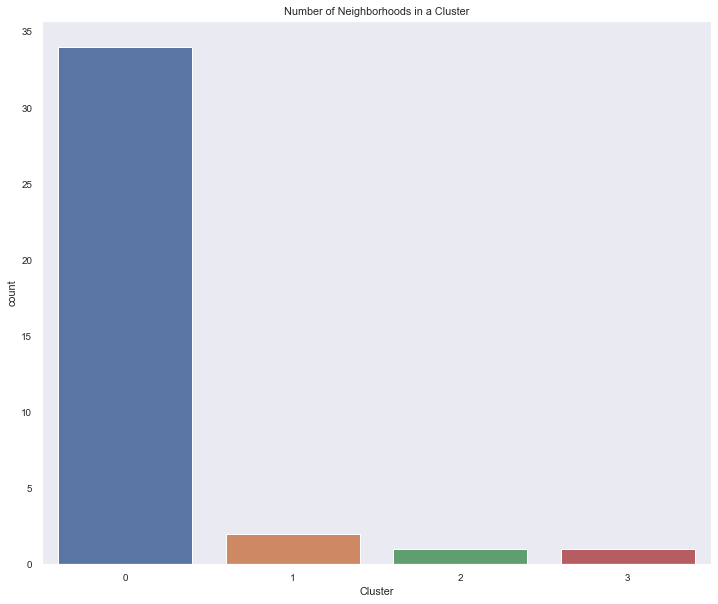

In [41]:
#Lets visualize this dataframe

plt.figure(figsize = (12,10))

sns.countplot(nbhd_df['Cluster'])

plt.title("Number of Neighborhoods in a Cluster")
plt.grid(False)
plt.xticks([0,1,2,3])

plt.show()

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood

In [42]:
toronto.head()

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M4E,East Toronto,The Beaches,43.676357,-79.293031


In [43]:
#add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [44]:
neighborhoods_venues_sorted.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,Berczy Park,Coffee_Shop,Cocktail_Bar,Bakery,Cheese_Shop,Restaurant,Farmers_Market,Beer_Bar,Seafood_Restaurant,Concert_Hall,Basketball_Stadium
1,0,"Brockton, Parkdale Village, Exhibition Place",Café,Breakfast_Spot,Nightclub,Coffee_Shop,Yoga_Studio,Grocery_Store,Pet_Store,Performing_Arts_Venue,Italian_Restaurant,Intersection
2,0,"Business reply mail Processing Centre, South C...",Light_Rail_Station,Yoga_Studio,Garden,Brewery,Farmers_Market,Fast_Food_Restaurant,Spa,Burrito_Place,Restaurant,Auto_Workshop
3,0,"CN Tower, King and Spadina, Railway Lands, Har...",Airport_Service,Airport_Lounge,Airport_Terminal,Airport,Harbor__Marina,Plane,Coffee_Shop,Boat_or_Ferry,Rental_Car_Location,Bar
4,0,Central Bay Street,Coffee_Shop,Sandwich_Place,Italian_Restaurant,Café,Salad_Place,Bubble_Tea_Shop,Burger_Joint,Yoga_Studio,Diner,Ice_Cream_Shop


In [45]:
#creating a new dataframe
toronto_merged = toronto

In [46]:
#Merging the dataframe
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighbourhood')

In [47]:
#dropping any unncessary NA values
toronto_merged.dropna(inplace = True)
toronto_merged.head()

,PostalCode,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,0.0,Coffee_Shop,Bakery,Pub,Park,Breakfast_Spot,Café,Theater,Yoga_Studio,Cosmetics_Shop,Shoe_Store
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,0.0,Coffee_Shop,Sushi_Restaurant,College_Cafeteria,Yoga_Studio,Fried_Chicken_Joint,Portuguese_Restaurant,Park,Nightclub,Music_Venue,Mexican_Restaurant
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,0.0,Clothing_Store,Coffee_Shop,Café,Hotel,Cosmetics_Shop,Japanese_Restaurant,Bubble_Tea_Shop,Middle_Eastern_Restaurant,Ramen_Restaurant,Fast_Food_Restaurant
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,0.0,Coffee_Shop,Café,Cocktail_Bar,Gastropub,Italian_Restaurant,American_Restaurant,Hotel,Farmers_Market,Department_Store,Clothing_Store
4,M4E,East Toronto,The Beaches,43.676357,-79.293031,0.0,Asian_Restaurant,Pub,Trail,Health_Food_Store,Yoga_Studio,Doner_Restaurant,Diner,Discount_Store,Distribution_Center,Dog_Run


In [48]:
toronto_merged['Cluster Labels'] = toronto_merged['Cluster Labels'].astype(int)

In [49]:
toronto_merged.head() # check the last columns!

,PostalCode,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,0,Coffee_Shop,Bakery,Pub,Park,Breakfast_Spot,Café,Theater,Yoga_Studio,Cosmetics_Shop,Shoe_Store
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,0,Coffee_Shop,Sushi_Restaurant,College_Cafeteria,Yoga_Studio,Fried_Chicken_Joint,Portuguese_Restaurant,Park,Nightclub,Music_Venue,Mexican_Restaurant
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,0,Clothing_Store,Coffee_Shop,Café,Hotel,Cosmetics_Shop,Japanese_Restaurant,Bubble_Tea_Shop,Middle_Eastern_Restaurant,Ramen_Restaurant,Fast_Food_Restaurant
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,0,Coffee_Shop,Café,Cocktail_Bar,Gastropub,Italian_Restaurant,American_Restaurant,Hotel,Farmers_Market,Department_Store,Clothing_Store
4,M4E,East Toronto,The Beaches,43.676357,-79.293031,0,Asian_Restaurant,Pub,Trail,Health_Food_Store,Yoga_Studio,Doner_Restaurant,Diner,Discount_Store,Distribution_Center,Dog_Run


### Visualizing the clusters

In [50]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(clusters)
ys = [i + x + (i*x)**2 for i in range(clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

------
------

##### Thank you and have a great day
<i> Radi <i>